In [5]:
import torch
import Trainer
from network import NFM
import torch.utils.data as Data
from Utils.criteo_loader import getTestData, getTrainData

nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class MLP17(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(101)
        self.fc1 = nn.Linear(101, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model17 = MLP17().cuda()
print(model17)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(237)
        self.fc1 = nn.Linear(237, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(90)
        self.fc1 = nn.Linear(90, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
print(model2)


class MLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(99)
        self.fc1 = nn.Linear(99, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model3 = MLP3().cuda()
print(model3)
class MLP4(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(81)
        self.fc1 = nn.Linear(81, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model4 = MLP4().cuda()
print(model4)

class MLP5(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(69)
        self.fc1 = nn.Linear(69, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model5 = MLP5().cuda()
print(model5)

class MLP6(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(119)
        self.fc1 = nn.Linear(119, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model6 = MLP6().cuda()
print(model6)

class MLP7(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(86)
        self.fc1 = nn.Linear(86, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model7 = MLP7().cuda()
print(model7)

class MLP8(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(9)
        self.fc1 = nn.Linear(9, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model8 = MLP8().cuda()
print(model8)

class MLP9(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(101)
        self.fc1 = nn.Linear(101, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model9 = MLP9().cuda()
print(model9)


class MLP10(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(74)
        self.fc1 = nn.Linear(74, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model10 = MLP10().cuda()
print(model10)


class MLP11(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(78)
        self.fc1 = nn.Linear(78, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model11 = MLP11().cuda()
print(model11)

class MLP12(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(101)
        self.fc1 = nn.Linear(101, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model12 = MLP12().cuda()
print(model12)

class MLP13(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(70)
        self.fc1 = nn.Linear(70, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model13 = MLP13().cuda()
print(model13)

class MLP14(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(118)
        self.fc1 = nn.Linear(118, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model14 = MLP14().cuda()
print(model14)
class MLP15(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(124)
        self.fc1 = nn.Linear(124, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model15 = MLP15().cuda()
print(model15)
class MLP16(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(138)
        self.fc1 = nn.Linear(138, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model16 = MLP16().cuda()
print(model16)

class MLP16(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(138)
        self.fc1 = nn.Linear(138, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model16 = MLP16().cuda()
print(model16)
class MLP20(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(117)
        self.fc1 = nn.Linear(117, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model20 = MLP20().cuda()
print(model20)

class MLP21(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(90)
        self.fc1 = nn.Linear(90, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model21 = MLP21().cuda()
print(model21)

import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
import config
import evaluate
import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
            
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics

from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import sys 
#import network
import config
import evaluate
import data_utils
import Trainer
import torchmetrics


def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
MLP17(
  (bn0): BatchNorm1d(101, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=101, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [2]:
#for 20_genes
#ConvAttMLP_top 30 and NFM_top 20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvAttMLP/contri_30_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_intersecions_30_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['KLF6', 'IFI44L', 'PTP4A1', 'PCK1', 'CEBPB', 'LYPLA1', 'EEF1AKMT3', 'GDF15', 'CYP39A1', 'NUDT4', 'ZNRF4', 'IFI6', 'DUSP6', 'ADPRM', 'ABCB7', 'RHOB']
intersecion_list: ['CHODL', 'RPS27L', 'CYP2J2', 'CHP1', 'VAMP8', 'RGS5', 'FCGBP', 'ATP6V0E2', 'UQCR10', 'ZNHIT1', 'IFI6', 'MS4A4A', 'TESC', 'AGL', 'LGMN', 'CTSG', 'LHPP', 'NDUFA13']
intersecion_list: ['VTCN1', 'COX15', 'FOS', 'METTL9', 'ACTA2', 'NEAT1', 'NR1D2', 'TRA2A', 'ISCU', 'EPM2AIP1', 'MEST', 'TFAP2A', 'CFLAR', 'VDR', 'ACP6', 'NDUFA13', 'TUBA4B']
intersecion_list: ['KLF6', 'BHLHE40', 'ELF3', 'VAMP8', 'SLC3A2', 'ABCB4', 'FST', 'TYMP', 'ATP6V1F', 'UQCR10', 'IFI6', 'MNX1', 'TESC', 'ZNF593', 'RHOB']
intersecion_list: ['ECH1', 'WDR12', 'RPL38', 'NONO', 'AFP', 'LYPLA1', 'ITGB3BP', 'FCGBP', 'NUDT4', 'FKBP4', 'CPVL', 'PEG10', 'WASHC3', 'LARP1', 'TMEM100']
intersecion_list: ['IFIT1', 'COL4A3BP', 'LIPC', 'CHCHD3', 'DEPTOR', 'ITGB3BP', 'MRPS16', 'PTMS', 'IFI6', 'RRM2', 'EPM2AIP1', 'ATP5IF1', 'MRPL44', 'PAFAH1B3', 'LGMN']
inte

In [3]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_intersecions_30_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_genes_intersections_30_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/30_20_ConvAttMLP_NFM_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/30_20_ConvAttMLP_NFM_test_info.csv')



117
columns: ['RGS5', 'ACTA2', 'NEAT1', 'RRM2', 'PLIN3', 'SH3BP2', 'TFAP2A', 'OLFML3', 'NDUFA13', 'OXCT1', 'VTCN1', 'PPP6R1', 'COX15', 'AFP', 'EEF1AKMT3', 'FCGBP', 'ITGB3BP', 'SPI1', 'ACAD10', 'PEG10', 'ZNF593', 'HERC5', 'LHPP', 'SERPINF1', 'IFI44L', 'LIPC', 'METTL9', 'ABCC3', 'COX5B', 'NUDT4', 'ATP6V1F', 'PTMS', 'MEST', 'AGL', 'CTSG', 'CAMLG', 'CHCHD3', 'ADI1', 'SLC3A2', 'LYPLA1', 'TYMP', 'ZNHIT1', 'IFI6', 'MNX1', 'TESC', 'ATP5IF1', 'MT2A', 'TFAM', 'ACP6', 'ABHD2', 'ABCB7', 'VAMP8', 'ECH1', 'BDKRB2', 'CHODL', 'ELF3', 'RPS27L', 'NONO', 'RPA3', 'ABLIM1', 'BCCIP', 'MAP3K1', 'GPX2', 'TRIM14', 'TRA2A', 'ISCU', 'CPVL', 'CFLAR', 'LARP1', 'IGLV2-14', 'TMEM100', 'OSBPL1A', 'RGN', 'PCK1', 'UGDH', 'FST', 'CYP39A1', 'UQCR10', 'CFB', 'VDR', 'NR1D2', 'GPX3', 'RHOB', 'TUBA4B', 'IFIT1', 'ANKRD2', 'CYP2J2', 'NDUFB1', 'CEBPB', 'ZNRF4', 'ABCB4', 'ATP6V0E2', 'DEPTOR', 'MRPS16', 'FKBP4', 'EPM2AIP1', 'ALB', 'DUSP6', 'ADPRM', 'WASHC4', 'COL4A3BP', 'KLF6', 'BHLHE40', 'WDR12', 'RPL38', 'CGREF1', 'PTP4A1', 'UC

549 118
549 118


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:789: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:790: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2812, device='cuda:0')
Training Epoch: 0, total loss: 63.691470
total_train_accuracy: tensor(0.5333, device='cuda:0')
Training Epoch: 1, total loss: 60.372471
total_train_accuracy: tensor(0.6208, device='cuda:0')
Training Epoch: 2, total loss: 58.769456
total_train_accuracy: tensor(0.6563, device='cuda:0')
Training Epoch: 3, total loss: 57.794134
total_train_accuracy: tensor(0.7208, device='cuda:0')
Training Epoch: 4, total loss: 56.553539
total_train_accuracy: tensor(0.7604, device='cuda:0')
Training Epoch: 5, total loss: 55.548408
total_train_accuracy: tensor(0.7521, device='cuda:0')
Training Epoch: 6, total loss: 55.186141
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 7, total loss: 54.862701
total_train_accuracy: tensor(0.7813, device='cuda:0')
Training Epoch: 8, total loss: 54.136782
total_train_accuracy: tensor(0.7938, device='cuda:0')
Training Epoch: 9, total loss: 53.778360
total_train_accuracy: tensor(0.7896, device='cuda:

total_train_accuracy: tensor(0.9083, device='cuda:0')
Training Epoch: 87, total loss: 46.193224
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 88, total loss: 44.929152
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 89, total loss: 45.645090
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 90, total loss: 45.090586
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 45.447184
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 92, total loss: 45.506936
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 93, total loss: 45.433260
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 94, total loss: 45.000668
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 95, total loss: 44.720863
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 96, total loss: 45.174453
total_train_accuracy: tensor(0.9313, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


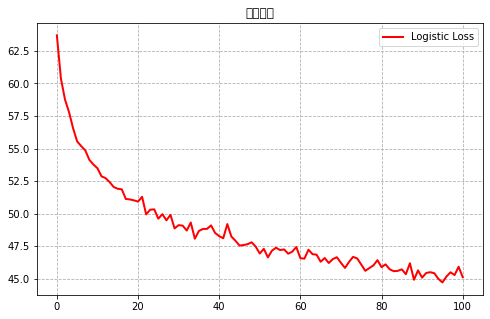

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:827: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:828: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8333, device='cuda:0')
acc_test_each_k: tensor(0.8333, device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 0, total loss: 45.992622
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 1, total loss: 45.321460
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 2, total loss: 45.683910
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 3, total loss: 45.233019
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 4, total loss: 45.082272
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 5, total loss: 45.875466
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 6, total loss: 45.027165
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 7, total loss: 45.219483
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 8, total loss: 45.017523
total_train_

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.764695
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 86, total loss: 43.571243
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 43.535659
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 43.385541
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 43.536086
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 43.150906
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 43.640320
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 43.193546
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 93, total loss: 43.471011
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 94, total loss: 43.896745
total_train_accuracy: tensor(0.9604, dev

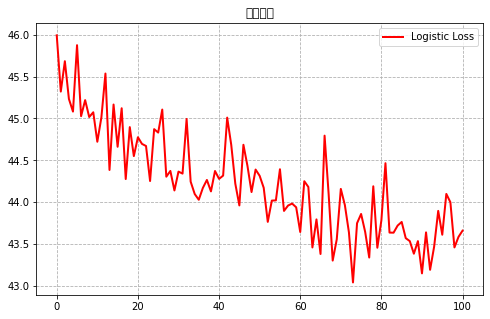

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 43.794175
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 43.378906
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 43.433296
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.518842
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 43.471711
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 5, total loss: 43.707593
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 43.086651
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 43.046832
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 43.177581
total_train_

total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 85, total loss: 43.379063
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.252784
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 87, total loss: 43.904636
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 88, total loss: 42.910020
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.954433
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.828350
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.899653
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 92, total loss: 43.185871
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 93, total loss: 43.451701
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.793033
total_train_accuracy: tensor(0.9750, dev

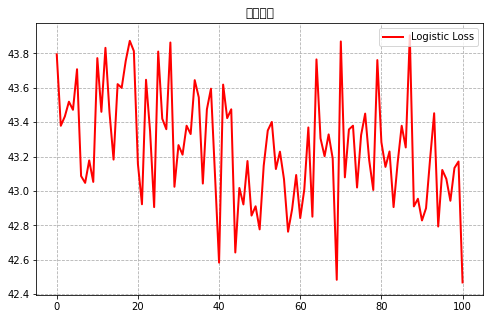

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 43.003269
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 43.133761
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 43.015294
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 3, total loss: 43.328608
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 4, total loss: 43.136151
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.694048
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 6, total loss: 43.343707
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 42.905677
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 43.156471
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.768804
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 43.172790
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.575404
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.518611
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.308950
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.960428
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.807222
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.664361
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.662508
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 95, total loss: 42.284620
total_train_accuracy: tensor(0.9667, dev

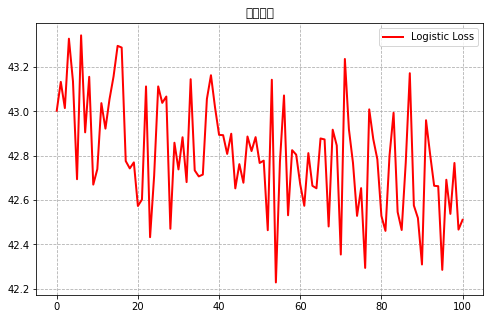

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.550813
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.880826
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 2, total loss: 42.556957
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.487553
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 43.100531
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.677789
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.463092
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.450425
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 8, total loss: 42.871263
total_train_

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.551885
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 42.695638
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 42.912504
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.327588
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.368406
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 43.132922
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.490381
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.717354
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.651218
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.598848
total_train_accuracy: tensor(0.9771, dev

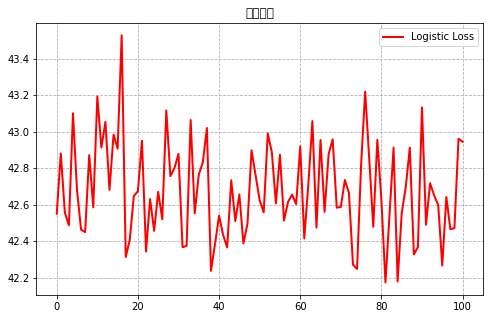

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.683666
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 43.094027
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 2, total loss: 42.575618
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.416550
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.670269
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 5, total loss: 42.795404
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.080983
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.458290
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.588953
total_train_

total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 85, total loss: 42.998928
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.509386
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.594100
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.642569
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.533688
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.366187
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.213622
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 92, total loss: 42.210368
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 93, total loss: 41.986929
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.200554
total_train_accuracy: tensor(0.9771, dev

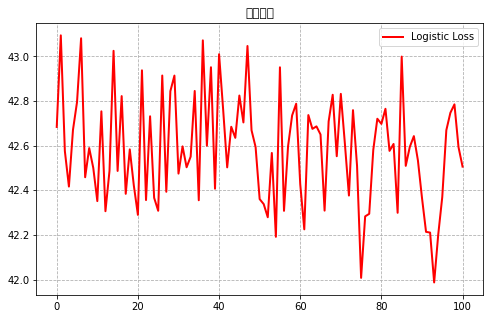

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.437595
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.644730
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.493143
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.385421
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.710600
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 5, total loss: 42.204663
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.602503
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.498414
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.619340
total_train_accuracy

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 42.658007
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.822369
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 87, total loss: 42.169278
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 42.927578
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.356845
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.327708
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.502707
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.424882
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 93, total loss: 42.023812
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.324484
total_train_accuracy: tensor(0.9729, dev

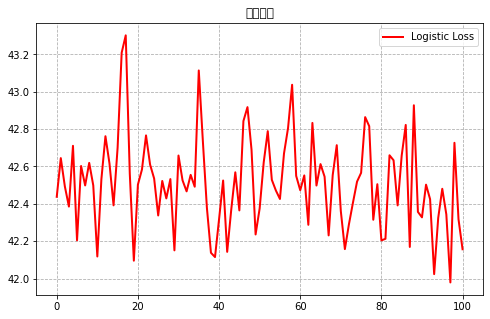

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.634892
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 1, total loss: 42.100597
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.449144
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 3, total loss: 42.413290
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.334873
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 5, total loss: 42.978078
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 6, total loss: 42.591217
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 7, total loss: 42.450742
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.457288
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.431991
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 86, total loss: 42.340758
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.677116
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.597249
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.418498
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 90, total loss: 42.040949
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.345447
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.496973
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 93, total loss: 42.372241
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.391451
total_train_accuracy: tensor(0.9729, dev

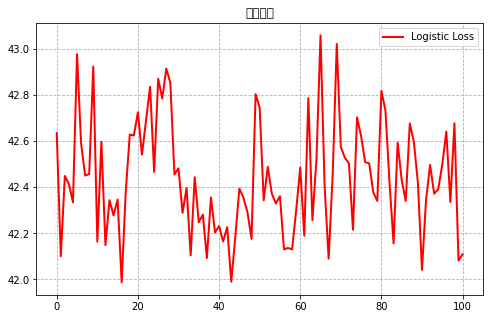

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.338002
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.799273
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.333407
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.564532
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.600562
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.482995
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 42.991438
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.313213
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.616488
total_train_accuracy

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.668945
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 87, total loss: 42.682688
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.318360
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 89, total loss: 42.934796
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.420879
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.399834
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.468388
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.649809
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 42.835239
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 95, total loss: 42.531875
total_train_accuracy: tensor(0.9583, dev

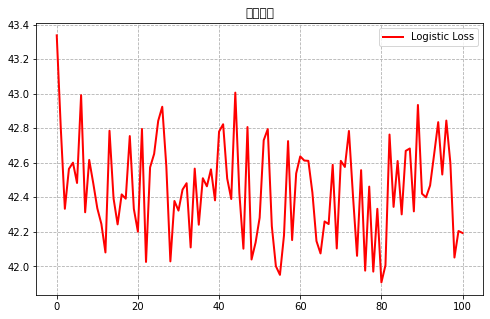

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 118
549 118
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 0, total loss: 42.282207
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 1, total loss: 42.984651
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 2, total loss: 42.454116
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 3, total loss: 42.981808
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.234692
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.287473
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 6, total loss: 42.059308
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.301736
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.202805
total_train_accuracy

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.087356
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 87, total loss: 42.380749
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.253709
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.451267
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.726470
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.492867
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 92, total loss: 42.340206
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.561993
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.343651
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 95, total loss: 42.721815
total_train_accuracy: tensor(0.9813, dev

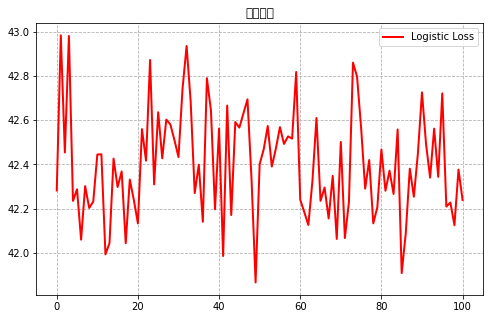

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
[tensor(0.8333, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0')]
[array(0.8333334, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32)]
acc_test_metrics: 0.9750001


In [6]:
#train model with new features of 94
model=model20
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/30_20_ConvAttMLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/30_20_ConvAttMLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/30_20_ConvAttMLP_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP20(
  (bn0): BatchNorm1d(117, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=117, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 118
f1_score:  %.4f 0.8850706595033159
accuracy_score: 0.8913043478260869
recall_score: 0.8852345040580335
pre_recall: 0.8924986758836089
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

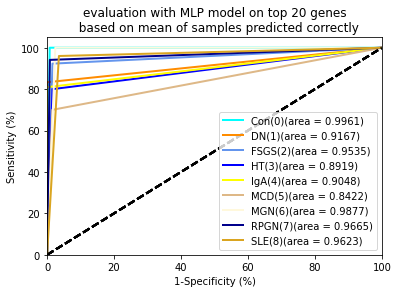

In [8]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/30_20_ConvAttMLP_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP20()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/30_20_ConvAttMLP_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [2]:
#for 20_genes
#ConvAttMLP_top 30 and NFM_top 30
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/ConvAttMLP/contri_30_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_30_names_df.csv'


mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
    
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)

        # 求交集
        intersection = mlp_set.intersection(nfm_set)

        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['CYP39A1', 'GDF15', 'PTP4A1', 'ADPRM', 'ZNRF4', 'KLF6', 'IFI6', 'AHCYL1', 'EEF1AKMT3', 'DUSP6', 'TMEM100', 'LYPLA1', 'CHCHD3', 'ABCB7', 'ZNF195', 'IFI44L', 'NR0B2', 'PCK1', 'RHOB', 'CEBPB', 'MT2A', 'NUDT4']
intersecion_list: ['CYP2J2', 'LGMN', 'ATP6V0E2', 'IFI6', 'VAMP8', 'NDUFA13', 'MS4A4A', 'TUBB2B', 'TMEM100', 'FCGBP', 'CTSG', 'RGS5', 'RPS27L', 'CHODL', 'TESC', 'LHPP', 'ZNHIT1', 'AGL', 'CPVL', 'CHP1', 'TYR', 'UQCR10']
intersecion_list: ['TFAP2A', 'EPM2AIP1', 'NEAT1', 'CFLAR', 'TRA2A', 'VTCN1', 'TUBA4B', 'METTL9', 'MEST', 'FOS', 'CTTN', 'VDR', 'NR1D2', 'ISCU', 'ACTA2', 'NDUFA13', 'ACP6', 'ACVR1B', 'COX15']
intersecion_list: ['ABCB4', 'RHOB', 'UQCR10', 'TESC', 'MNX1', 'ZNF593', 'TRIM14', 'KLF6', 'IFI6', 'ELF3', 'TYMP', 'VAMP8', 'BHLHE40', 'SLC3A2', 'FST', 'KLF9', 'COX8A', 'ATP6V1F']
intersecion_list: ['TMEM100', 'NONO', 'PEG10', 'LYPLA1', 'FCGBP', 'WDR12', 'RPL38', 'AFP', 'RHBDL1', 'NUDT4', 'ECH1', 'ITGB3BP', 'VAMP8', 'LARP1', 'CPVL', 'WASHC3', 'COX15', 'FKBP4']
int

In [3]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/ConvAttMLP_NFM_genes_intersections_30.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/30_ConvAttMLP_NFM_train_val_info.csv')


test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/30_ConvAttMLP_NFM_test_info.csv')



138
columns: ['RPA3', 'NONO', 'ADPRM', 'LGMN', 'ATP5IF1', 'KLF6', 'TRIM14', 'ANKRD2', 'IFIT1', 'TMEM100', 'RRM2', 'LYPLA1', 'ABCB7', 'MRPS16', 'VDR', 'GPX3', 'ISCU', 'RGS5', 'RPS27L', 'COX15', 'IGLV2-14', 'ABCD3', 'IFI44L', 'OSBPL1A', 'OVOL2', 'LHPP', 'NR0B2', 'CFB', 'MAP3K1', 'ABLIM1', 'UCHL1', 'ECH1', 'SPI1', 'TYMP', 'CPVL', 'TYR', 'ABCB4', 'CFLAR', 'MRPL44', 'IFI6', 'BCCIP', 'ELF3', 'PLIN3', 'LLGL2', 'DUSP6', 'ACVR1B', 'NDUFB1', 'FCGBP', 'RPL38', 'CTSG', 'CHODL', 'HKDC1', 'GPX2', 'TESC', 'LARP1', 'ACTA2', 'CEBPB', 'ZNHIT1', 'VTCN1', 'NUDT4', 'COL4A3BP', 'MEST', 'CTTN', 'ADM2', 'PPP6R1', 'PLEKHA5', 'NR1D2', 'CAMLG', 'ABHD2', 'CYP2J2', 'GDF15', 'ATP6V0E2', 'PDK3', 'RHBDL1', 'AHCYL1', 'VAMP8', 'EEF1AKMT3', 'TTC1', 'MS4A4A', 'TUBB2B', 'SH3BP2', 'UGDH', 'PTMS', 'LHX1', 'OLFML3', 'CGREF1', 'CD163', 'HERC5', 'ZNF195', 'PEG10', 'HP', 'COX5B', 'TUBA4B', 'PCK1', 'ATP6V1F', 'WASHC3', 'BDKRB2', 'EPM2AIP1', 'PAFAH1B3', 'AFP', 'AGL', 'BHLHE40', 'SLC3A2', 'ADI1', 'UQCR10', 'OXCT1', 'TFAM', 'CYP39A

549 139
549 139


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:730: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:731: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2792, device='cuda:0')
Training Epoch: 0, total loss: 63.836004
total_train_accuracy: tensor(0.4896, device='cuda:0')
Training Epoch: 1, total loss: 60.737590
total_train_accuracy: tensor(0.6104, device='cuda:0')
Training Epoch: 2, total loss: 58.790243
total_train_accuracy: tensor(0.6604, device='cuda:0')
Training Epoch: 3, total loss: 57.881723
total_train_accuracy: tensor(0.7417, device='cuda:0')
Training Epoch: 4, total loss: 56.624464
total_train_accuracy: tensor(0.7125, device='cuda:0')
Training Epoch: 5, total loss: 56.155728
total_train_accuracy: tensor(0.7396, device='cuda:0')
Training Epoch: 6, total loss: 55.306740
total_train_accuracy: tensor(0.7813, device='cuda:0')
Training Epoch: 7, total loss: 54.851019
total_train_accuracy: tensor(0.7833, device='cuda:0')
Training Epoch: 8, total loss: 54.227493
total_train_accuracy: tensor(0.7896, device='cuda:0')
Training Epoch: 9, total loss: 53.765892
total_train_accuracy: tensor(0.8104, device='cuda:

total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 86, total loss: 45.763479
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 87, total loss: 45.188186
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 88, total loss: 45.006296
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 89, total loss: 45.079023
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 90, total loss: 44.952655
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 91, total loss: 45.466399
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 92, total loss: 45.270471
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 93, total loss: 44.718571
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 94, total loss: 45.146549
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 95, total loss: 45.613015
total_train_accuracy: tensor(0.9542, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


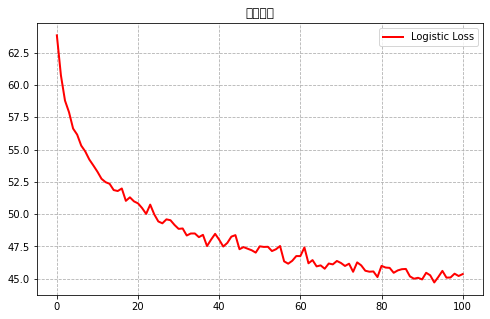

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:768: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:769: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8542, device='cuda:0')
acc_test_each_k: tensor(0.8542, device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 0, total loss: 44.885800
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 1, total loss: 45.756955
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 2, total loss: 45.947519
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 3, total loss: 45.246875
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 4, total loss: 45.236319
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 5, total loss: 44.924021
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 44.699186
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 7, total loss: 45.060806
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 8, total loss: 44.684599
total_train_

total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 85, total loss: 43.427257
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.485378
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 87, total loss: 44.080699
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 88, total loss: 43.599121
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 89, total loss: 44.152771
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 90, total loss: 44.045314
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 91, total loss: 44.220680
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 92, total loss: 43.786622
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 43.587224
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 43.749156
total_train_accuracy: tensor(0.9583, dev

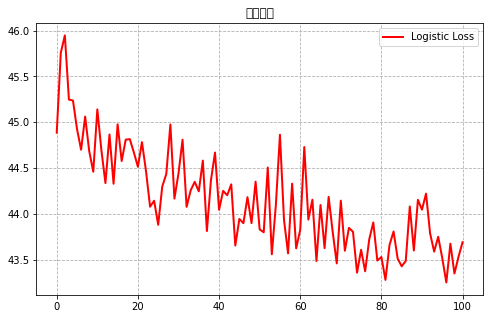

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 0, total loss: 43.863494
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.928182
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 2, total loss: 43.452299
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 3, total loss: 43.888101
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.232640
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 43.606970
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.663814
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 43.634862
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 8, total loss: 43.611036
total_train_

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 43.142025
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.585987
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.651963
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 88, total loss: 43.253372
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 89, total loss: 42.940645
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.536845
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 43.045312
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.711622
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.452914
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.684266
total_train_accuracy: tensor(0.9604, dev

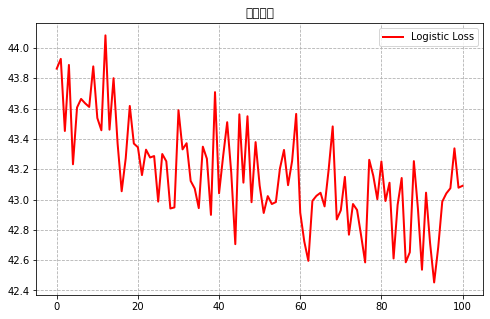

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 0, total loss: 43.601452
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 1, total loss: 42.887780
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.756983
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.918811
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 43.054065
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 43.341927
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.253252
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 43.245312
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.644055
total_train_accuracy

total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 85, total loss: 43.201666
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.658870
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.746026
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.692019
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.377096
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 43.073119
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 91, total loss: 42.503732
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 92, total loss: 42.389344
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.499671
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.428890
total_train_accuracy: tensor(0.9604, dev

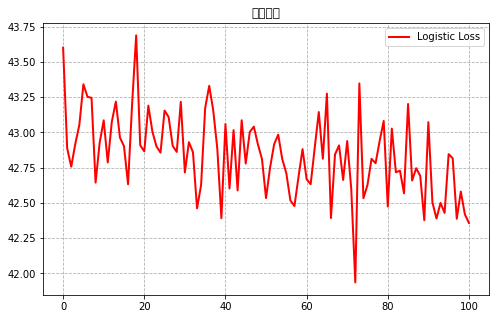

test
test
test
total_test_accuracy: tensor(0.9583, device='cuda:0')
acc_test_each_k: tensor(0.9583, device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 0, total loss: 43.009287
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.778385
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.353545
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 3, total loss: 42.903071
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 4, total loss: 42.998832
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 5, total loss: 43.025104
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 43.352180
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 7, total loss: 42.725364
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.578678
total_train_

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.493702
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.586210
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 87, total loss: 42.622806
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.172315
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 89, total loss: 42.930334
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.597736
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 91, total loss: 42.656117
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.605601
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.605013
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 94, total loss: 42.478334
total_train_accuracy: tensor(0.9583, dev

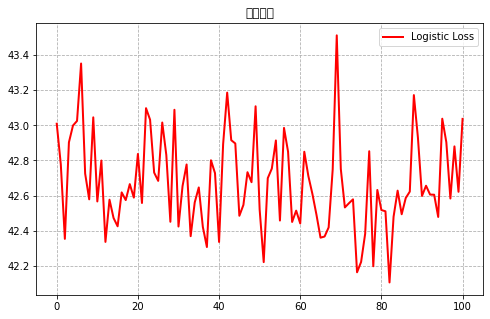

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.018621
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 43.115765
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.735442
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.311620
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.437165
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.554017
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 6, total loss: 42.876508
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 7, total loss: 43.192986
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.406822
total_train_

total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 85, total loss: 42.149528
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 86, total loss: 42.673719
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.907575
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 42.558295
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.526115
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.765422
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.429626
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.367544
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 93, total loss: 42.533570
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.689103
total_train_accuracy: tensor(0.9625, dev

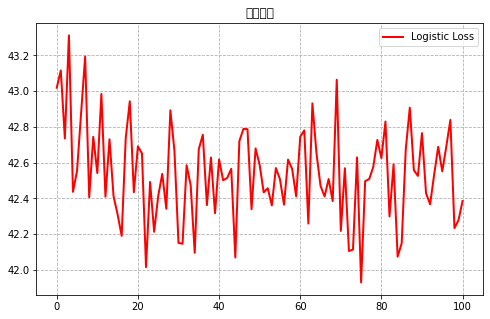

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 0, total loss: 42.704466
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 1, total loss: 42.666342
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.303916
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 3, total loss: 42.139871
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.356712
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 5, total loss: 42.786958
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 6, total loss: 42.245349
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 7, total loss: 42.631005
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 8, total loss: 42.493671
total_train_accuracy

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.680579
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.597330
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.358117
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.351459
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 42.118392
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 90, total loss: 42.409180
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.598314
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.118713
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.120871
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.714435
total_train_accuracy: tensor(0.9750, dev

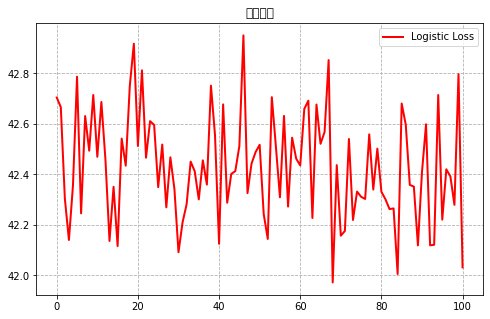

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.625425
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 1, total loss: 42.341065
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 2, total loss: 42.417600
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 3, total loss: 42.456606
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.631761
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.561324
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.304809
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.381991
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 42.675462
total_train_accuracy

total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 85, total loss: 42.409586
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.654166
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 87, total loss: 42.211923
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 42.569328
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.295711
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.640223
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 91, total loss: 42.018793
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 92, total loss: 42.444624
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 93, total loss: 42.212193
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.241118
total_train_accuracy: tensor(0.9688, dev

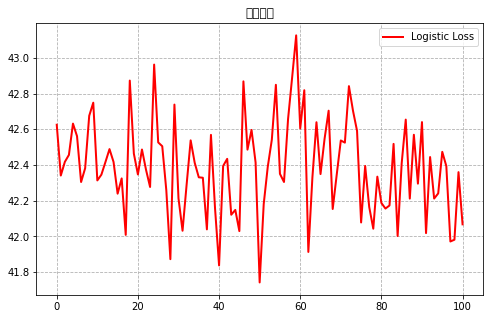

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.447966
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 1, total loss: 42.755790
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.609797
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.760053
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.669878
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 5, total loss: 42.522117
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 6, total loss: 43.245703
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 7, total loss: 42.194924
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 42.749646
total_train_accuracy

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 85, total loss: 42.657057
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.379665
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.189486
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.186119
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.263552
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 90, total loss: 42.265795
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.261828
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 92, total loss: 42.450911
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.296777
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.180472
total_train_accuracy: tensor(0.9729, dev

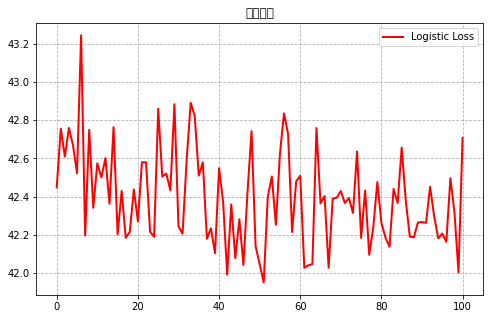

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 139
549 139
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 0, total loss: 43.409964
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.559807
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.178713
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.046433
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.165076
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.284155
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.127888
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 7, total loss: 42.210440
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 8, total loss: 42.084525
total_train_accuracy

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.273040
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.290650
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.755329
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.211988
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.648674
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 91, total loss: 42.344851
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.589033
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.322776
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 94, total loss: 42.081432
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 95, total loss: 42.241411
total_train_accuracy: tensor(0.9917, dev

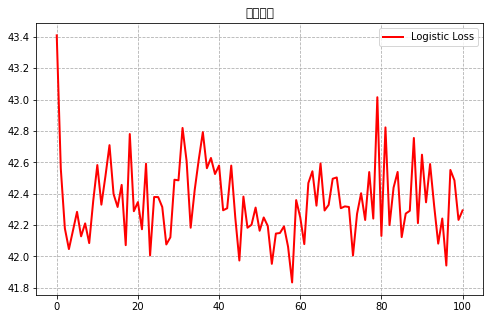

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8542, device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9583, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8541667, dtype=float32), array(0.9583334, dtype=float32), array(1., dtype=float32), array(0.9583334, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.975


In [4]:
#train model with new features of 94
model=model16
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/30_ConvAttMLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/30_ConvAttMLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/30_ConvAttMLP_NFM/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP16(
  (bn0): BatchNorm1d(138, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=138, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 139
f1_score:  %.4f 0.8787661711305419
accuracy_score: 0.8840579710144928
recall_score: 0.8772450860686154
pre_recall: 0.8860217203100907
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

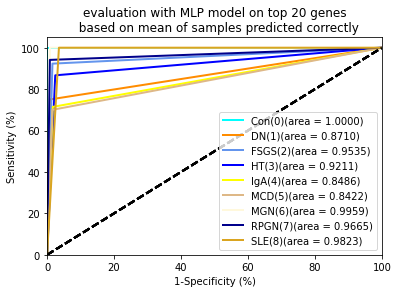

In [5]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/30_ConvAttMLP_NFM/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP16()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/30_ConvAttMLP_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [2]:
#for 20_genes
#MLP and ConvMLPy and NFM interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_30_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_20_names_df.csv'
convmlpy_20_path='results_genes/ConvAttMLP/contri_30_names_df.csv'

mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')
convmlpy_20_df=pd.read_csv(convmlpy_20_path)

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
convmlpy_20_df=convmlpy_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)
convmlpy_20_np=np.array(convmlpy_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_NFM_intersecions_30_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
        convmlpy_data=convmlpy_20_np[i,:].tolist()
        
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)
        convmlpy_set=set(convmlpy_data)
        # 求交集
        intersection1 = mlp_set.intersection(nfm_set)
        intersection=convmlpy_set.intersection(intersection1)
        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


intersecion_list: ['ABCB7', 'RHOB', 'EEF1AKMT3', 'GDF15', 'CEBPB', 'PTP4A1', 'DUSP6', 'PCK1', 'ADPRM', 'KLF6']
intersecion_list: ['RGS5', 'NDUFA13', 'AGL', 'CHODL', 'LHPP', 'ZNHIT1', 'RPS27L', 'CYP2J2', 'CHP1', 'CTSG', 'UQCR10']
intersecion_list: ['COX15', 'TRA2A', 'CFLAR', 'METTL9', 'VTCN1', 'ISCU', 'NEAT1', 'ACP6', 'ACTA2', 'EPM2AIP1', 'MEST', 'VDR']
intersecion_list: ['MNX1', 'RHOB', 'FST', 'TESC', 'ATP6V1F', 'BHLHE40', 'VAMP8', 'ABCB4', 'SLC3A2', 'KLF6']
intersecion_list: ['LARP1', 'TMEM100', 'RPL38', 'AFP', 'ITGB3BP', 'LYPLA1', 'WASHC3', 'NONO']
intersecion_list: ['LIPC', 'IFIT1', 'DEPTOR', 'PTMS', 'PAFAH1B3', 'MRPS16', 'ITGB3BP', 'RRM2', 'ATP5IF1', 'COL4A3BP', 'EPM2AIP1']
intersecion_list: ['WASHC4', 'UCHL1', 'RGN', 'BDKRB2', 'SERPINF1', 'ABHD2', 'SPI1', 'PLIN3', 'NDUFB1', 'ADI1', 'OXCT1', 'NUDT4', 'ACAD10']
intersecion_list: ['PPP6R1', 'UGDH', 'CFB', 'ABCC3', 'SH3BP2', 'ATP6V1F', 'GPX2', 'ANKRD2', 'CGREF1', 'BCCIP']
intersecion_list: ['NDUFA13', 'MAP3K1', 'IFIT1', 'DEPTOR', 'HER

In [4]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_NFM_intersecions_30_20_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_AttConvMLP_NFM_genes_intersections_30_20.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/30_20_MLP_ConvAttMLP_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/30_20_MLP_ConvAttMLP_NFM_test_info.csv')



90
columns: ['IFIT1', 'MNX1', 'UGDH', 'CHODL', 'EEF1AKMT3', 'VTCN1', 'ZNHIT1', 'CFB', 'ISCU', 'ABCC3', 'PTP4A1', 'IFI44L', 'CYP2J2', 'RRM2', 'EPM2AIP1', 'LARP1', 'RPL38', 'WASHC4', 'RHOB', 'METTL9', 'ITGB3BP', 'ANKRD2', 'GPX3', 'ABCB4', 'ATP5IF1', 'ACAD10', 'MEST', 'VDR', 'MAP3K1', 'TMEM100', 'AGL', 'AFP', 'DEPTOR', 'CEBPB', 'RGN', 'ABLIM1', 'SERPINF1', 'COX5B', 'PCK1', 'PLIN3', 'ADPRM', 'SLC3A2', 'ADI1', 'CTSG', 'IFI6', 'RGS5', 'COX15', 'TRA2A', 'CFLAR', 'LHPP', 'ACP6', 'ACTA2', 'UQCR10', 'KLF6', 'HERC5', 'TESC', 'ALB', 'LYPLA1', 'RPS27L', 'VAMP8', 'COL4A3BP', 'CHP1', 'OXCT1', 'TRIM14', 'BCCIP', 'CGREF1', 'NDUFA13', 'PPP6R1', 'GDF15', 'SH3BP2', 'NEAT1', 'ABHD2', 'NDUFB1', 'ABCB7', 'LIPC', 'PAFAH1B3', 'PTMS', 'FST', 'MRPS16', 'UCHL1', 'GPX2', 'DUSP6', 'BDKRB2', 'TFAM', 'ATP6V1F', 'BHLHE40', 'SPI1', 'WASHC3', 'NUDT4', 'NONO', 'label']
(549, 91)
(138, 91)


549 91
549 91


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:810: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:811: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2688, device='cuda:0')
Training Epoch: 0, total loss: 63.887634
total_train_accuracy: tensor(0.5125, device='cuda:0')
Training Epoch: 1, total loss: 60.443417
total_train_accuracy: tensor(0.5854, device='cuda:0')
Training Epoch: 2, total loss: 59.173382
total_train_accuracy: tensor(0.6750, device='cuda:0')
Training Epoch: 3, total loss: 57.669961
total_train_accuracy: tensor(0.6708, device='cuda:0')
Training Epoch: 4, total loss: 57.184240
total_train_accuracy: tensor(0.7188, device='cuda:0')
Training Epoch: 5, total loss: 56.255724
total_train_accuracy: tensor(0.7188, device='cuda:0')
Training Epoch: 6, total loss: 55.987440
total_train_accuracy: tensor(0.7542, device='cuda:0')
Training Epoch: 7, total loss: 55.121097
total_train_accuracy: tensor(0.7854, device='cuda:0')
Training Epoch: 8, total loss: 54.357279
total_train_accuracy: tensor(0.7688, device='cuda:0')
Training Epoch: 9, total loss: 54.064419
total_train_accuracy: tensor(0.7583, device='cuda:

total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 86, total loss: 45.859183
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 87, total loss: 46.032128
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 88, total loss: 46.220075
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 89, total loss: 45.884866
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 90, total loss: 45.063017
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 91, total loss: 45.611387
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 92, total loss: 45.305619
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 93, total loss: 46.087361
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 94, total loss: 45.782375
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 95, total loss: 45.849456
total_train_accuracy: tensor(0.9125, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 100, total loss: 45.550478
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


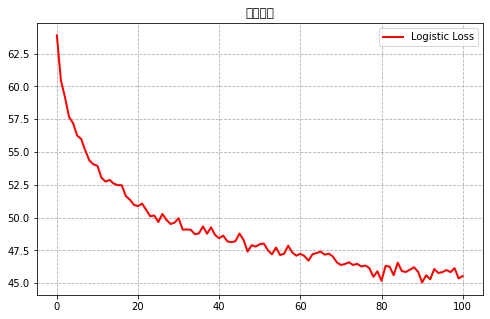

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:848: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:849: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8750, device='cuda:0')
acc_test_each_k: tensor(0.8750, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.8917, device='cuda:0')
Training Epoch: 0, total loss: 46.639427
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 1, total loss: 45.798613
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 2, total loss: 45.153545
total_train_accuracy: tensor(0.8958, device='cuda:0')
Training Epoch: 3, total loss: 46.339535
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 4, total loss: 45.930737
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 5, total loss: 45.764377
total_train_accuracy: tensor(0.9021, device='cuda:0')
Training Epoch: 6, total loss: 45.822371
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 7, total loss: 44.977765
total_train_accuracy: tensor(0.9042, device='cuda:0')
Training Epoch: 8, total loss: 45.735266
total_train_ac

total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 85, total loss: 43.989027
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 86, total loss: 44.077392
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 87, total loss: 43.888724
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 88, total loss: 43.824137
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 89, total loss: 44.015700
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 90, total loss: 44.239678
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 91, total loss: 43.544119
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 92, total loss: 43.930106
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 43.776863
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 94, total loss: 44.134892
total_train_accuracy: tensor(0.9625, dev

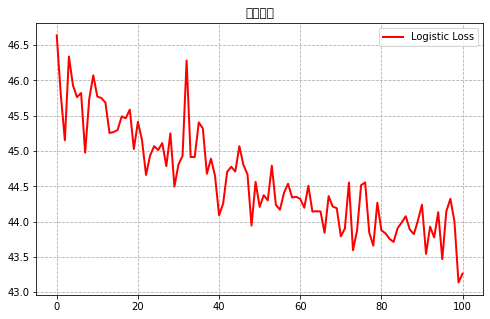

test
test
test
total_test_accuracy: tensor(0.8958, device='cuda:0')
acc_test_each_k: tensor(0.8958, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 0, total loss: 44.265386
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 1, total loss: 44.872258
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 43.552713
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 3, total loss: 43.966978
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 44.028270
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 43.097304
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 43.570260
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 7, total loss: 44.007306
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 8, total loss: 43.775609
total_train_ac

total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 85, total loss: 43.273695
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.073237
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 87, total loss: 43.470945
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.749711
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.924065
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 90, total loss: 42.949079
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 43.434560
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 92, total loss: 43.351286
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 43.378655
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.877364
total_train_accuracy: tensor(0.9729, dev

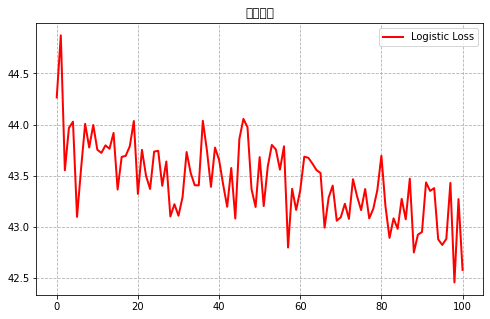

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 43.077747
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 1, total loss: 43.806115
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.152462
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.905247
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 43.307399
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.923244
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 6, total loss: 43.102265
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.798741
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 43.071308
total_train_accuracy: 

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.992169
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.133215
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.903263
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 88, total loss: 43.058007
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 43.165615
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.770587
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 43.213561
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.995375
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.592982
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 94, total loss: 42.632971
total_train_accuracy: tensor(0.9708, dev

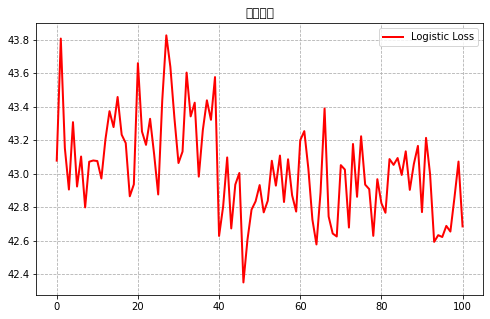

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 0, total loss: 43.289027
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 43.397079
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 2, total loss: 42.939715
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.961835
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 4, total loss: 43.236135
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 5, total loss: 43.453570
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.916910
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 43.176833
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 8, total loss: 42.897032
total_train_ac

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.502456
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 86, total loss: 42.557824
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 42.891129
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 88, total loss: 42.641940
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 43.094073
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.844594
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.812447
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.554630
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 42.847987
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.483256
total_train_accuracy: tensor(0.9729, dev

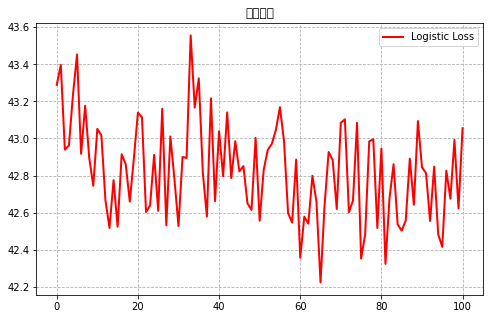

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.388706
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 43.158150
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 2, total loss: 43.089997
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 3, total loss: 42.949635
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.434299
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.707213
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 42.796436
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 43.043256
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.446100
total_train_ac

total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 85, total loss: 42.957420
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 86, total loss: 42.224098
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.799177
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.343703
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 42.822087
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.626464
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 42.968599
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 92, total loss: 42.070949
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 42.548176
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.376017
total_train_accuracy: tensor(0.9792, dev

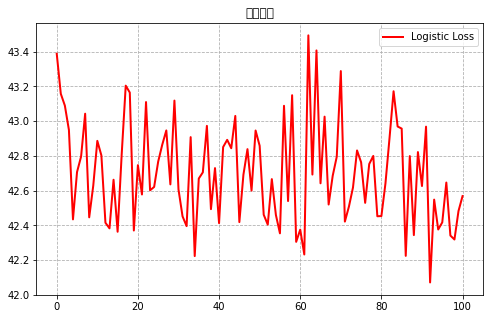

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 0, total loss: 42.838844
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 42.904302
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 2, total loss: 43.249933
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.105364
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 4, total loss: 42.947548
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.604383
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.071966
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 43.170797
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 8, total loss: 42.994114
total_train_accuracy: 

total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 85, total loss: 43.003667
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.327389
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 87, total loss: 42.579022
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.335401
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 89, total loss: 42.397228
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.570455
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 91, total loss: 42.656462
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 92, total loss: 42.348582
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.557685
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 94, total loss: 42.395714
total_train_accuracy: tensor(0.9688, dev

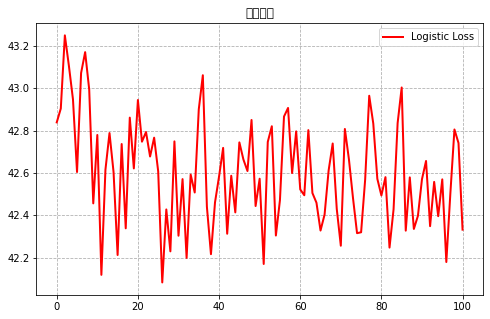

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 0, total loss: 42.579738
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 1, total loss: 42.608743
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.405018
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.353122
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 4, total loss: 43.171193
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 5, total loss: 42.408919
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.121633
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 7, total loss: 42.878443
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.511841
total_train_accuracy: 

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 42.808470
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 86, total loss: 42.648721
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 87, total loss: 42.602786
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.582241
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 42.834805
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.589374
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.455252
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 92, total loss: 42.244946
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 93, total loss: 42.340980
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 94, total loss: 42.269515
total_train_accuracy: tensor(0.9813, dev

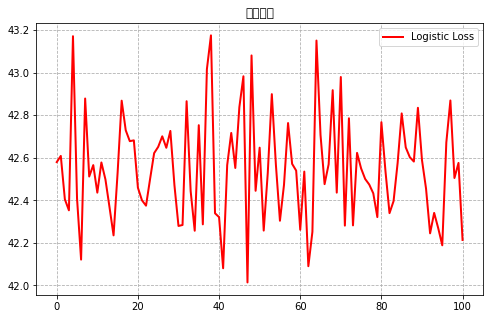

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 0, total loss: 42.877895
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.564869
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.627110
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 42.668068
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 4, total loss: 42.930276
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.561580
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 6, total loss: 42.480330
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 7, total loss: 42.606301
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.261421
total_train_accuracy: 

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.279099
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.322817
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 87, total loss: 42.253313
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.488475
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 42.670692
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 90, total loss: 42.079956
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.435507
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.790254
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 93, total loss: 42.729708
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.373406
total_train_accuracy: tensor(0.9688, dev

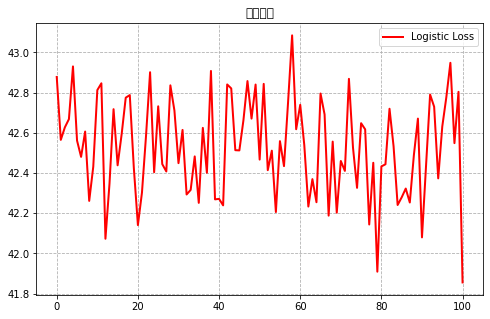

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 91
549 91
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 42.809377
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.961758
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 2, total loss: 42.778083
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.453406
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 42.706244
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.332000
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 6, total loss: 42.593640
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 7, total loss: 42.323104
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.593732
total_train_accuracy: 

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 85, total loss: 42.464960
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.001007
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.246290
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.312316
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 89, total loss: 42.406326
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.293624
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.210616
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.439275
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.674361
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 94, total loss: 43.052441
total_train_accuracy: tensor(0.9792, dev

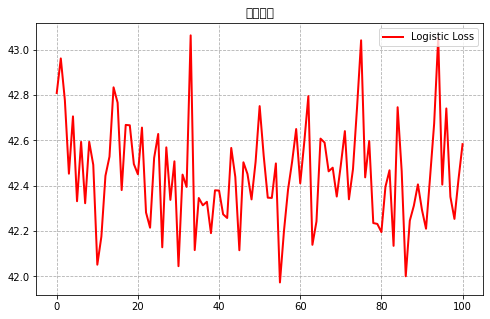

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8750, device='cuda:0'), tensor(0.8958, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.875, dtype=float32), array(0.8958334, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9729167


In [6]:
#train model with new features of 94
model=model21
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/30_20_MLP_ConvAttMLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/30_20_MLP_ConvAttMLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvAttMLP_NFM_30_20/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP21(
  (bn0): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=90, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 91
f1_score:  %.4f 0.8996923431400928
accuracy_score: 0.8985507246376812
recall_score: 0.8994673082908378
pre_recall: 0.9094515849933806
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

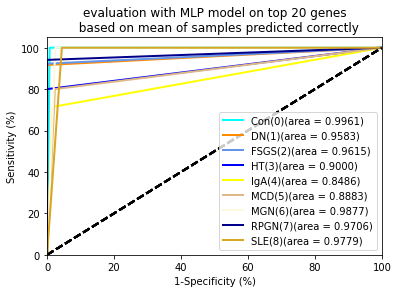

In [7]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvAttMLP_NFM_30_20/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP21()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/30_20_MLP_ConvAttMLP_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 



In [ ]:
#for 20_genes
#MLP and ConvMLPy and NFM interaction top20
import pandas as pd 
import numpy as np
mlp_20_path='results_genes/MLP/contri_30_names_df.csv'
nfm_layer_20_path='results_genes/NFM_layer_2/contri_30_names_df.csv'
convmlpy_20_path='results_genes/ConvAttMLP/contri_30_names_df.csv'

mlp_20_df=pd.read_csv(mlp_20_path,sep=',')
nfm_layer_20_df=pd.read_csv(nfm_layer_20_path,sep=',')
convmlpy_20_df=pd.read_csv(convmlpy_20_path)

#print(mlp_20_df)
mlp_20_df=mlp_20_df.iloc[:,1:]
nfm_layer_20_df=nfm_layer_20_df.iloc[:,1:]
convmlpy_20_df=convmlpy_20_df.iloc[:,1:]
#print(mlp_20_df.shape)
mlp_20_np=np.array(mlp_20_df)
nfm_layer_20_np=np.array(nfm_layer_20_df)
convmlpy_20_np=np.array(convmlpy_20_df)

#print(mlp_20_np)


import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_NFM_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    #writer.writerow(result_list)

    #intersections_20_list=[]
    for i in range(9):
        mlp_data=mlp_20_np[i,:].tolist()
        nfm_data=nfm_layer_20_np[i,:].tolist()
        convmlpy_data=convmlpy_20_np[i,:].tolist()
        
        # 将列表转换为集合
        mlp_set = set(mlp_data)
        nfm_set = set(nfm_data)
        convmlpy_set=set(convmlpy_data)
        # 求交集
        intersection1 = mlp_set.intersection(nfm_set)
        intersection=convmlpy_set.intersection(intersection1)
        # 将交集转换回列表
        intersection_list = list(intersection)
        print('intersecion_list:',intersection_list)
        writer.writerow(intersection_list)
        #intersections_20_list.append(intersection_list)
#print('len:',len(intersections_20_list))    
file.close()    
#intersections_20_np=np.array(intersections_20_list)  
#intersections_20_df=pd.DataFrame(intersections_20_np)
#intersections_20_df.to_csv('results_genes/intersections/intersecions_20_df.csv')


In [ ]:
#compute unions for  the intersections_20_df of every class 
#intersections_20_df=pd.read_csv('results_genes/intersections/intersecions_20_df.csv',sep=',')
#from chartGPT of the following code
#intersections_20_df=intersections_20_df.iloc[:,1:]
#print(intersections_20_df)
#intersections_20_np=np.array(intersections_20_df)


result = set()
import csv
csv_filename = "results_genes/intersections/MLP_ConvAttMLP_NFM_intersecions_30_df.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='r', newline='') as csvfile:
    csv_reader = csv.reader(csvfile)
    # 逐行读取数据
    for row in csv_reader:
        row_set=set(row)
        result=result.union(row_set)
        
        

# 或者使用集合的union方法的更简洁写法，使用集合解析
# result = set().union(*list_of_lists)

# 或者使用 | 运算符
# result = set().union(*list_of_lists)

# 将结果转回列表
result_list = list(result)

print(len(result_list))

import csv
csv_filename = "results_genes/intersections/MLP_AttConvMLP_NFM_genes_intersections.csv"

# 使用CSV模块保存列表为CSV文件#妙
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    writer.writerow(result_list)

#这将输出所有列表的并集，不包含重复的元素。在这个例子中，结果会是 [1, 2, 3, 4, 5, 6, 7]。你可以根据你的实际需求将这个结果转换为列表或者保留为集合，具体取决于你的应用场景。
#抽取训练集和测试集中的数据

#生成新选取元素的数据集
train_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv'
test_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv'

train_df=pd.read_csv(train_path,sep=',')


train_df=train_df.iloc[:,1:]


columns=result_list
columns.append('label')
print('columns:',columns)


train_df2=train_df[columns]
print(train_df2.shape)
train_df2.to_csv('results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_train_val_info.csv')

test_df=pd.read_csv(test_path,sep=',')

test_df=test_df.iloc[:,1:]



test_df=test_df[columns]
print(test_df.shape)
test_df.to_csv('results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_test_info.csv')



549 102
549 102


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:750: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:751: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.2500, device='cuda:0')
Training Epoch: 0, total loss: 64.041525
total_train_accuracy: tensor(0.5083, device='cuda:0')
Training Epoch: 1, total loss: 60.833846
total_train_accuracy: tensor(0.5667, device='cuda:0')
Training Epoch: 2, total loss: 59.365928
total_train_accuracy: tensor(0.6354, device='cuda:0')
Training Epoch: 3, total loss: 57.911781
total_train_accuracy: tensor(0.6875, device='cuda:0')
Training Epoch: 4, total loss: 57.063051
total_train_accuracy: tensor(0.7000, device='cuda:0')
Training Epoch: 5, total loss: 56.456829
total_train_accuracy: tensor(0.7250, device='cuda:0')
Training Epoch: 6, total loss: 55.911099
total_train_accuracy: tensor(0.7479, device='cuda:0')
Training Epoch: 7, total loss: 55.137324
total_train_accuracy: tensor(0.7458, device='cuda:0')
Training Epoch: 8, total loss: 54.736552
total_train_accuracy: tensor(0.7771, device='cuda:0')
Training Epoch: 9, total loss: 54.364551
total_train_accuracy: tensor(0.7729, device='cuda:

total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 86, total loss: 45.798672
total_train_accuracy: tensor(0.9104, device='cuda:0')
Training Epoch: 87, total loss: 45.941162
total_train_accuracy: tensor(0.9229, device='cuda:0')
Training Epoch: 88, total loss: 46.162030
total_train_accuracy: tensor(0.9292, device='cuda:0')
Training Epoch: 89, total loss: 45.646671
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 90, total loss: 45.626061
total_train_accuracy: tensor(0.9167, device='cuda:0')
Training Epoch: 91, total loss: 46.197886
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 92, total loss: 45.215417
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 93, total loss: 45.565603
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 94, total loss: 45.298442
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 95, total loss: 45.403606
total_train_accuracy: tensor(0.9438, dev

/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, 

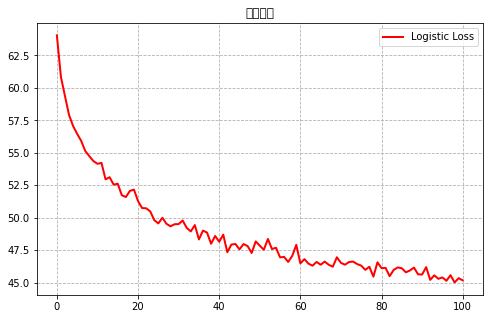

test
test
test
total_test_accuracy: tensor(0.8542, device='cuda:0')
acc_test_each_k: tensor(0.8542, device='cuda:0')
549 102


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:788: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:789: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


549 102
total_train_accuracy: tensor(0.8979, device='cuda:0')
Training Epoch: 0, total loss: 46.083300
total_train_accuracy: tensor(0.9208, device='cuda:0')
Training Epoch: 1, total loss: 45.721988
total_train_accuracy: tensor(0.9063, device='cuda:0')
Training Epoch: 2, total loss: 46.047998
total_train_accuracy: tensor(0.9125, device='cuda:0')
Training Epoch: 3, total loss: 45.390453
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 4, total loss: 45.765164
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 5, total loss: 45.376282
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 6, total loss: 45.146411
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 7, total loss: 45.269628
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 8, total loss: 44.534885
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 9, total loss: 45.133483
total_train_accuracy: tensor(0.9333, devic

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 43.471063
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.495490
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 88, total loss: 43.439440
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 89, total loss: 43.678300
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 90, total loss: 43.671380
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 91, total loss: 44.247147
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 43.728449
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 93, total loss: 43.636892
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 94, total loss: 43.493762
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 95, total loss: 43.496357
total_train_accuracy: tensor(0.9729, dev

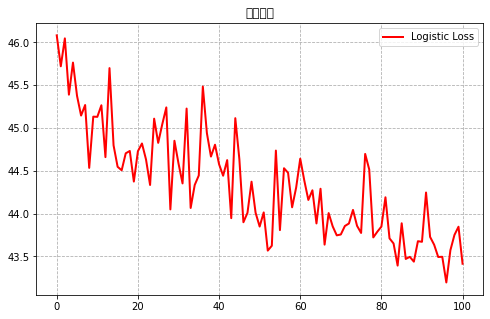

test
test
test
total_test_accuracy: tensor(0.9167, device='cuda:0')
acc_test_each_k: tensor(0.9167, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9188, device='cuda:0')
Training Epoch: 0, total loss: 44.801654
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 1, total loss: 44.058024
total_train_accuracy: tensor(0.9250, device='cuda:0')
Training Epoch: 2, total loss: 44.519855
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 3, total loss: 44.248702
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 4, total loss: 43.808410
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 43.149439
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 6, total loss: 43.599673
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 7, total loss: 43.283362
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 8, total loss: 43.473880
total_train_

total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 85, total loss: 43.030060
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 86, total loss: 43.077891
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.929468
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 88, total loss: 43.131711
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 89, total loss: 43.087798
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 90, total loss: 43.435518
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 91, total loss: 42.957926
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.950572
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 43.012959
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 94, total loss: 43.840638
total_train_accuracy: tensor(0.9583, dev

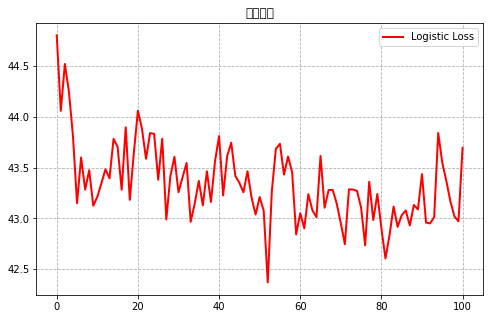

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 0, total loss: 43.236080
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 1, total loss: 43.176701
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.953017
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 3, total loss: 43.083649
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 4, total loss: 43.108721
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 43.002319
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 6, total loss: 43.675014
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 7, total loss: 43.160296
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 8, total loss: 43.639468
total_train_

total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 85, total loss: 43.150128
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 42.841110
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 87, total loss: 43.369798
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 88, total loss: 42.538745
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 89, total loss: 42.413823
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.609075
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 91, total loss: 43.206400
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 92, total loss: 42.225796
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 93, total loss: 42.776690
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.827200
total_train_accuracy: tensor(0.9708, dev

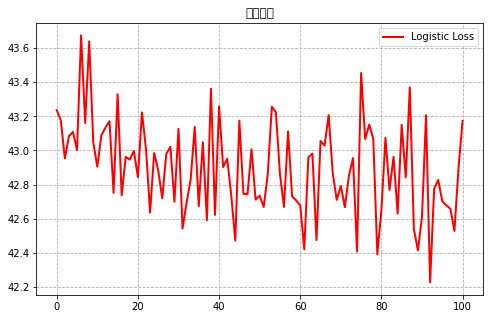

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 0, total loss: 43.325640
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 1, total loss: 42.844634
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 43.068084
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 3, total loss: 42.660342
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 4, total loss: 43.045589
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 5, total loss: 42.399378
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.750444
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 7, total loss: 43.369061
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 8, total loss: 43.367427
total_train_accuracy

total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 85, total loss: 42.776414
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.440036
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 87, total loss: 42.390378
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 88, total loss: 42.714452
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 89, total loss: 43.057352
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 90, total loss: 42.888959
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 91, total loss: 42.760637
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.583315
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 93, total loss: 42.582040
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.651168
total_train_accuracy: tensor(0.9500, dev

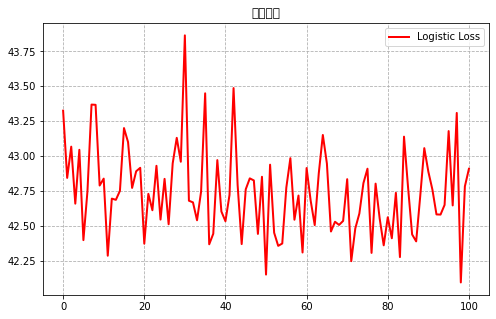

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9438, device='cuda:0')
Training Epoch: 0, total loss: 43.413092
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.765410
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 2, total loss: 42.731824
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.779763
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 4, total loss: 42.764718
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.802376
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 43.063734
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.440898
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 8, total loss: 42.555646
total_train_

total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 85, total loss: 42.769300
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 86, total loss: 42.343935
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 87, total loss: 43.012518
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 88, total loss: 42.723554
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 89, total loss: 42.854393
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 42.512359
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 91, total loss: 42.380541
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 43.045062
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.881537
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 94, total loss: 42.892351
total_train_accuracy: tensor(0.9708, dev

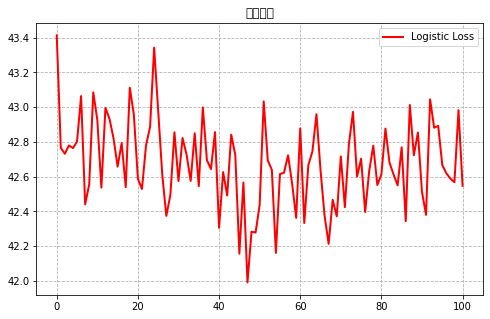

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 0, total loss: 42.821625
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 42.752666
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.402228
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 3, total loss: 42.142966
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 4, total loss: 43.196919
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 5, total loss: 42.713429
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 6, total loss: 42.805512
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 7, total loss: 42.156434
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 8, total loss: 42.767308
total_train_accuracy

total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 85, total loss: 42.697722
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 86, total loss: 42.838339
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 87, total loss: 42.079878
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.512171
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 89, total loss: 42.284643
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.185269
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 91, total loss: 42.038792
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 42.778074
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 93, total loss: 42.722478
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 94, total loss: 42.706043
total_train_accuracy: tensor(0.9688, dev

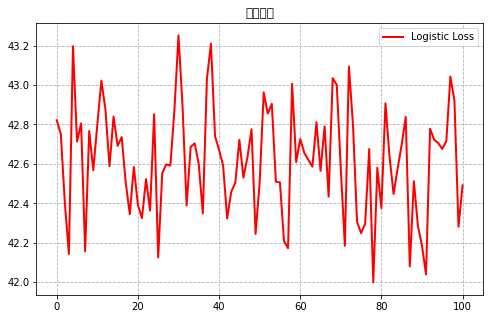

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 0, total loss: 43.298511
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 1, total loss: 42.769596
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.598086
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 3, total loss: 43.219912
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 4, total loss: 42.670034
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.330729
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 6, total loss: 42.663145
total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 7, total loss: 42.744914
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 8, total loss: 42.420765
total_train_accuracy

total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.463471
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 87, total loss: 42.574698
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 88, total loss: 42.314452
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 89, total loss: 42.556199
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 90, total loss: 42.189404
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 91, total loss: 42.003878
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.978291
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 93, total loss: 42.774988
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 94, total loss: 42.331513
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 95, total loss: 41.782051
total_train_accuracy: tensor(0.9750, dev

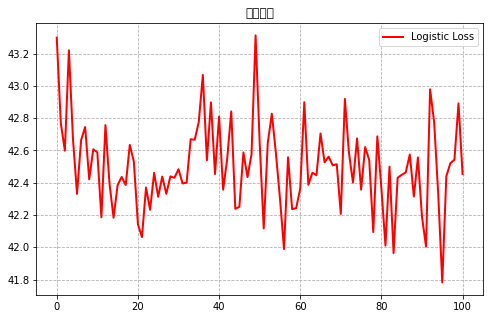

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.584028
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 1, total loss: 42.578235
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 2, total loss: 42.443236
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 3, total loss: 42.468775
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 4, total loss: 42.767192
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 5, total loss: 42.409925
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.175990
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.320240
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 8, total loss: 42.544614
total_train_accuracy

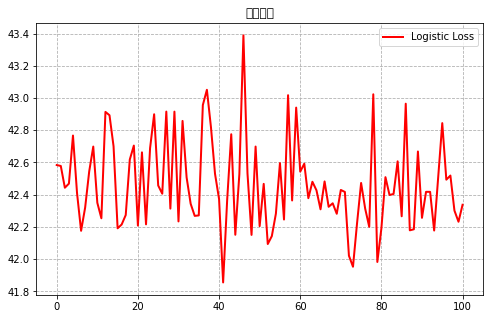

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 102
549 102
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.693694
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 1, total loss: 42.412177
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.268629
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 42.593591
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 4, total loss: 42.645818
total_train_accuracy: tensor(0.9667, device='cuda:0')
Training Epoch: 5, total loss: 42.507567
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 6, total loss: 42.253806
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 7, total loss: 42.271448
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.050241
total_train_accuracy

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 42.864361
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.037016
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 87, total loss: 42.053595
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 42.389284
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 89, total loss: 42.822096
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.241191
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 91, total loss: 42.442167
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 92, total loss: 42.155728
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 93, total loss: 42.115551
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 94, total loss: 42.177699
total_train_accuracy: tensor(0.9813, dev

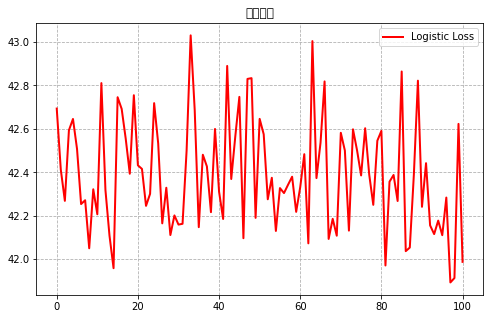

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
[tensor(0.8542, device='cuda:0'), tensor(0.9167, device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(0.9792, device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0'), tensor(1., device='cuda:0')]
[array(0.8541667, dtype=float32), array(0.9166667, dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(0.9791667, dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32), array(1., dtype=float32)]
acc_test_metrics: 0.9729167


In [9]:
#train model with new features of 94
model=model17
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='results_genes/intersections/models/MLP_ConvAttMLP_NFM_30/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


MLP17(
  (bn0): BatchNorm1d(101, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=101, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
138 102
f1_score:  %.4f 0.865457343479478
accuracy_score: 0.8768115942028986
recall_score: 0.8709487897723193
pre_recall: 0.8697201929115385
n_classes: 9


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

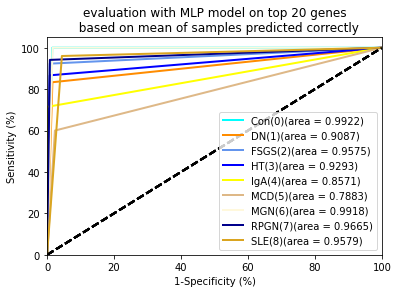

In [10]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
path='results_genes/intersections/models/MLP_ConvAttMLP_NFM_30/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
mlp=MLP17()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='results_genes/intersections/dataset/MLP_ConvAttMLP_NFM_test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('evaluation with MLP model on top 20 genes\n  based on mean of samples predicted correctly')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

